# Assignment -:Data Analytics

Task:
* Acquire data for Indian region from openAQ (or any other open api) the data is mainly about gases such as PM2.5, PM10, NO2, CO, SO2, Ozone and others. 
* You have to perform all this task using python/R language and make sure the data you fetch is of at least 100 records or more records for a period of time.
* Its upto you that you are fetching the historical air quality data or live
* Get the actual parameters PM2.5, PM10, NO2, CO, SO2, Ozone and region name 
* Perform exploratory data analysis.
* Mine the data using any ML algorithm
* Visualise the results.
* The output of your work will be the python code that we will run and evaluate at our end.

Note: 
1. You have to extract the data through API, not to use already available dataset.
2. This assignment is to evaluate your basic data science skills, kindly read the steps and perform accordingly

In [1]:
import pandas as pd
import requests # perform using api get and post method
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
result = requests.get('https://api.openaq.org/v1/locations?country=IN')

In [3]:
result.status_code

200

In [4]:
result.text

'{"meta":{"name":"openaq-api","license":"CC BY 4.0","website":"https://docs.openaq.org/","page":1,"limit":100,"found":321},"results":[{"id":"IN-35","country":"IN","city":"Agra","cities":["Agra"],"location":"Sanjay Palace, Agra - UPPCB","locations":["Sanjay Palace","Sanjay Palace, Agra - UPPCB"],"sourceName":"caaqm","sourceNames":["CPCB","data.gov.in","caaqm"],"sourceType":"government","sourceTypes":["government"],"coordinates":{"longitude":78.00598,"latitude":27.19866},"firstUpdated":"2016-03-22T00:20:00.000Z","lastUpdated":"2020-10-12T01:15:00.000Z","parameters":["co","no2","o3","pm25","so2"],"countsByMeasurement":[{"parameter":"co","count":58297},{"parameter":"no2","count":34395},{"parameter":"o3","count":59990},{"parameter":"pm25","count":58836},{"parameter":"so2","count":42847}],"count":254365},{"id":"IN-101","country":"IN","city":"Ahmedabad","cities":["Ahmedabad","On the terrace of Water distribution Center"],"location":"Maninagar, Ahmedabad - GPCB","locations":["Maninagar, Ahmeda

In [5]:
res =result.json()

In [6]:

lst=[]
for item in res['results']:
        lst.append(item)

In [7]:

df=pd.DataFrame(lst)

In [8]:
df.head()

,cities,city,coordinates,count,country,countsByMeasurement,firstUpdated,id,lastUpdated,location,locations,parameters,sourceName,sourceNames,sourceType,sourceTypes
0,[Agra],Agra,"{'longitude': 78.00598, 'latitude': 27.19866}",254365,IN,"[{'parameter': 'co', 'count': 58297}, {'parame...",2016-03-22T00:20:00.000Z,IN-35,2020-10-12T01:15:00.000Z,"Sanjay Palace, Agra - UPPCB","[Sanjay Palace, Sanjay Palace, Agra - UPPCB]","[co, no2, o3, pm25, so2]",caaqm,"[CPCB, data.gov.in, caaqm]",government,[government]
1,"[Ahmedabad, On the terrace of Water distributi...",Ahmedabad,"{'longitude': 72.59191, 'latitude': 23.00266}",203548,IN,"[{'parameter': 'co', 'count': 35733}, {'parame...",2018-03-09T05:30:00.000Z,IN-101,2020-10-12T01:15:00.000Z,"Maninagar, Ahmedabad - GPCB","[Maninagar, Ahmedabad - GPCB]","[co, no2, o3, pm10, pm25, so2]",caaqm,"[data.gov.in, caaqm]",government,[government]
2,[Aizawl],Aizawl,"{'longitude': 92.71928, 'latitude': 23.71763}",29772,IN,"[{'parameter': 'co', 'count': 4962}, {'paramet...",2020-03-19T04:30:00.000Z,IN-314,2020-10-02T23:15:00.000Z,"Sikulpuikawn, Aizawl - Mizoram PCB","[Sikulpuikawn, Aizawl - Mizoram PCB]","[co, no2, o3, pm10, pm25, so2]",caaqm,[caaqm],government,[government]
3,[Ajmer],Ajmer,"{'longitude': 74.64659, 'latitude': 26.47086}",197564,IN,"[{'parameter': 'co', 'count': 32985}, {'parame...",2018-04-16T03:15:00.000Z,IN-143,2020-10-12T01:00:00.000Z,"Civil Lines, Ajmer - RSPCB","[Civil Lines, Ajmer - RSPCB]","[co, no2, o3, pm10, pm25, so2]",caaqm,[caaqm],government,[government]
4,"[Alwar, Alwar, Alwar - Jaipur Rd]",Alwar,"{'longitude': 76.61153, 'latitude': 27.55479}",224411,IN,"[{'parameter': 'co', 'count': 37576}, {'parame...",2018-03-09T05:30:00.000Z,IN-72,2020-10-12T01:15:00.000Z,"Moti Doongri, Alwar - RSPCB","[Moti Doongri, Alwar, Rajasthan - RSPCB, Moti ...","[co, no2, o3, pm10, pm25, so2]",caaqm,"[data.gov.in, caaqm]",government,[government]


In [9]:
df['city'].unique()

array(['Agra', 'Ahmedabad', 'Aizawl', 'Ajmer', ' Alwar', 'Amaravati',
       'Ambala ', 'Amritsar', 'Ankleshwar', 'Asansol', 'Aurangabad',
       'Bagalkot', 'Baghpat', 'Bahadurgarh ', 'Ballabgarh', 'Bathinda ',
       'Bengaluru', 'Bhiwadi', 'Bhiwani', 'Bhopal', 'Brajrajnagar',
       'Bulandshahr', 'Chamarajanagar', 'Chandigarh', 'Chandrapur',
       'Charkhi Dadri', 'Chennai', 'Chikkaballapur', 'Chikkamagaluru',
       'Coimbatore', 'Damoh', 'Delhi'], dtype=object)

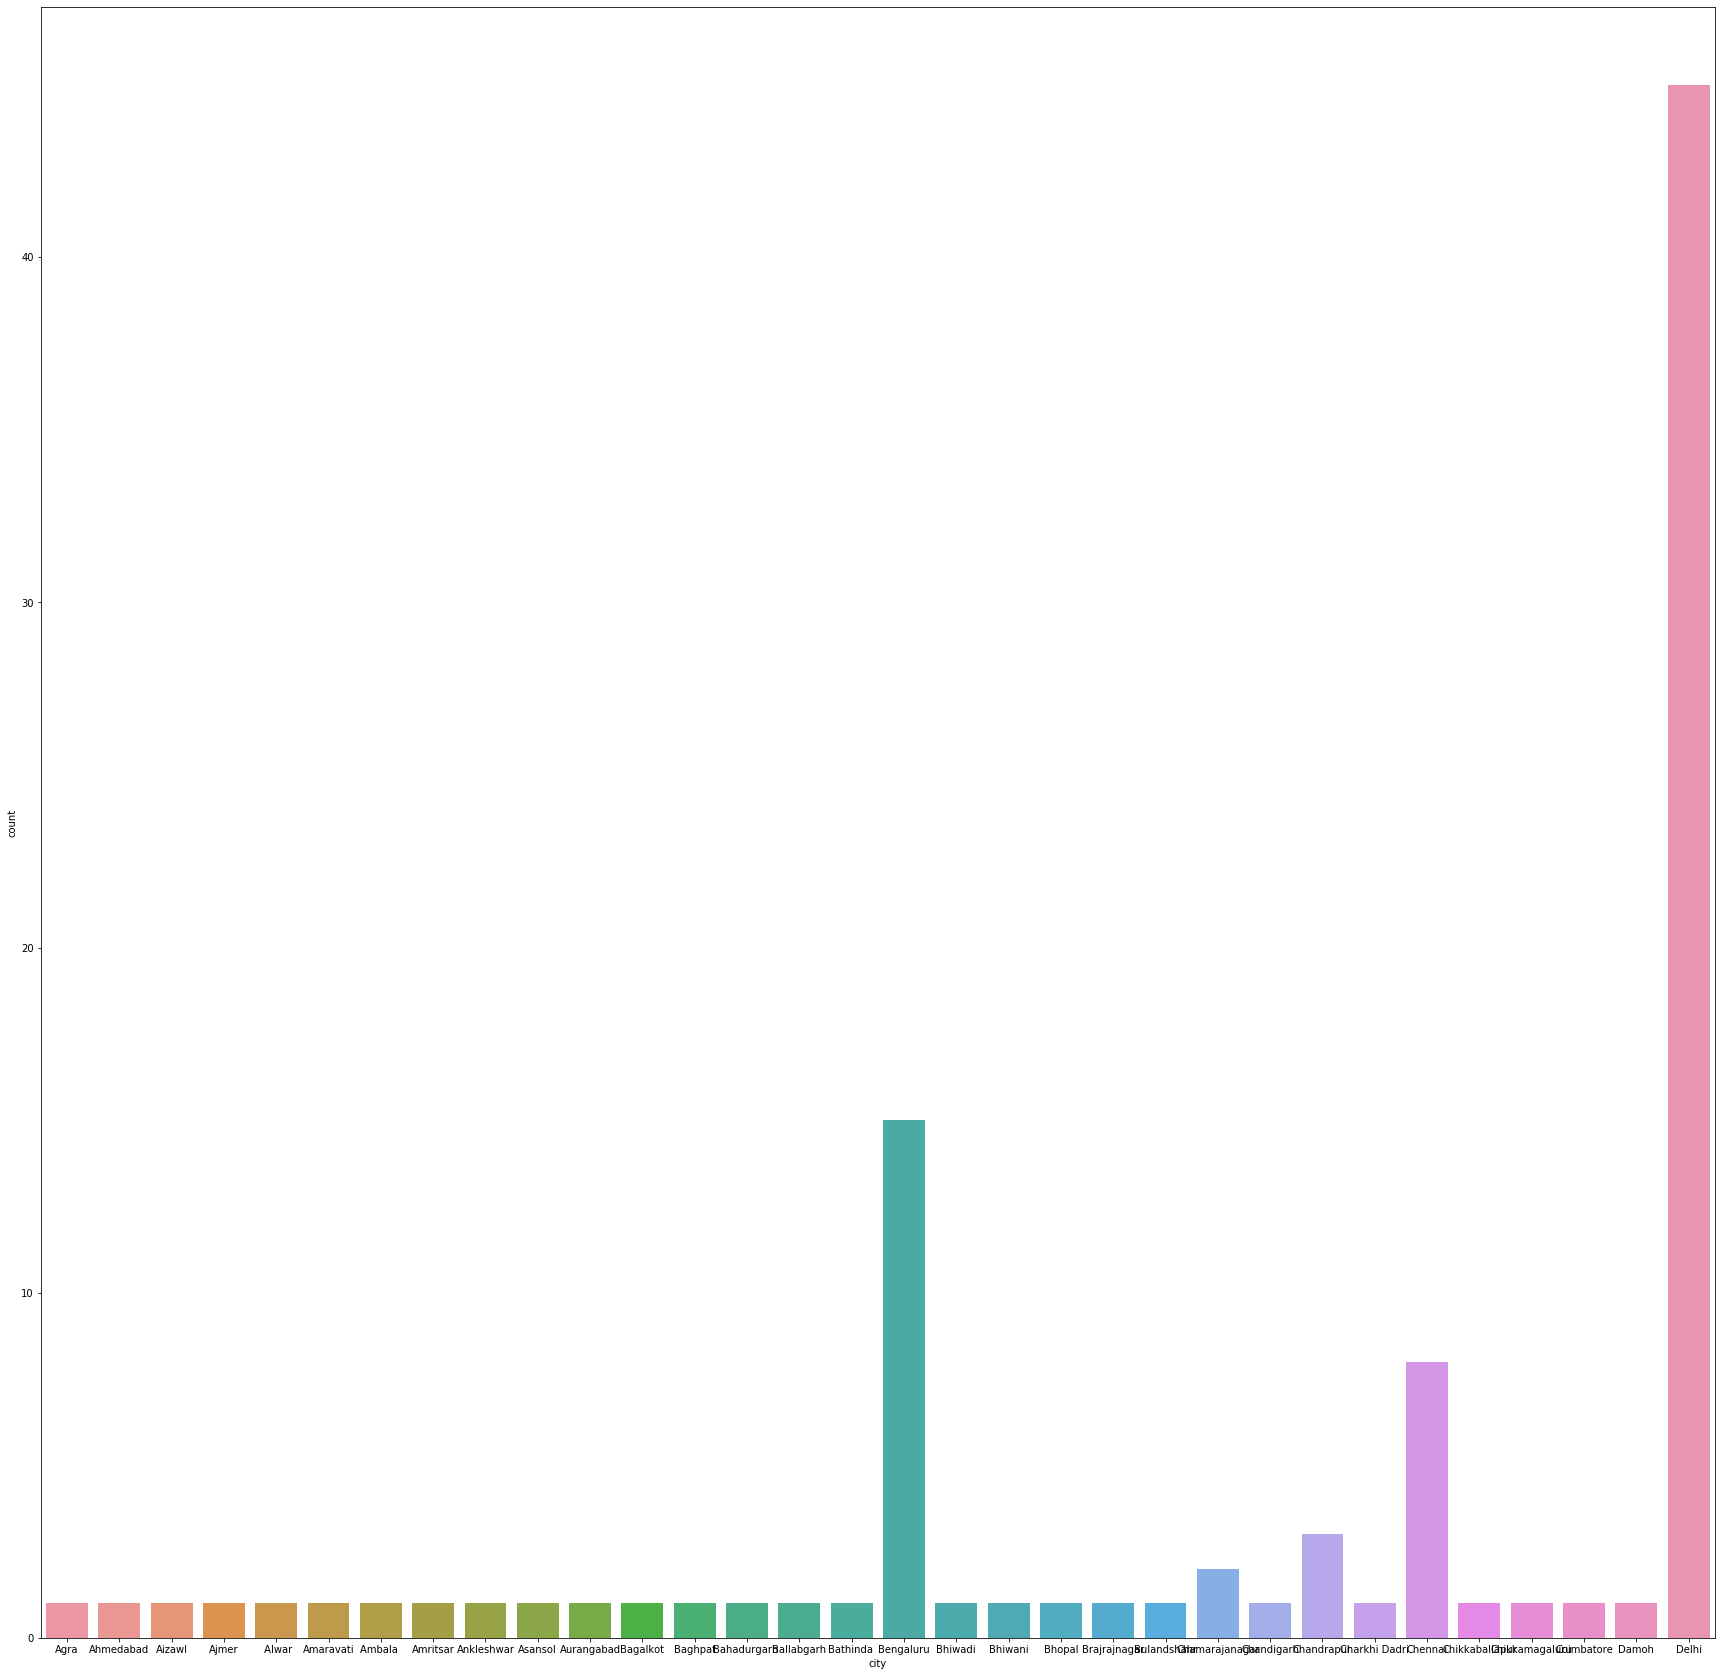

In [10]:
plt.figure(figsize=[30,30])
sns.countplot(df['city'])

In [11]:
df.describe()

,count
count,100.00000
mean,106834.71000
std,68260.88709
min,4.00000
25%,56835.00000
50%,121674.00000
75%,155114.25000
max,254365.00000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
cities                 100 non-null object
city                   100 non-null object
coordinates            100 non-null object
count                  100 non-null int64
country                100 non-null object
countsByMeasurement    100 non-null object
firstUpdated           100 non-null object
id                     100 non-null object
lastUpdated            100 non-null object
location               100 non-null object
locations              100 non-null object
parameters             100 non-null object
sourceName             100 non-null object
sourceNames            100 non-null object
sourceType             100 non-null object
sourceTypes            100 non-null object
dtypes: int64(1), object(15)
memory usage: 12.6+ KB


In [13]:
lst2=[]
for measure in df['countsByMeasurement']:
    lst2.append(measure)

In [14]:
para_df=pd.DataFrame(lst2,columns=['CO','NO2','O3','PM10','PM25','SO2'])

In [15]:
para_df.head()

,CO,NO2,O3,PM10,PM25,SO2
0,"{'parameter': 'co', 'count': 58297}","{'parameter': 'no2', 'count': 34395}","{'parameter': 'o3', 'count': 59990}","{'parameter': 'pm25', 'count': 58836}","{'parameter': 'so2', 'count': 42847}",None
1,"{'parameter': 'co', 'count': 35733}","{'parameter': 'no2', 'count': 36040}","{'parameter': 'o3', 'count': 35820}","{'parameter': 'pm10', 'count': 24772}","{'parameter': 'pm25', 'count': 36064}","{'parameter': 'so2', 'count': 35119}"
2,"{'parameter': 'co', 'count': 4962}","{'parameter': 'no2', 'count': 4962}","{'parameter': 'o3', 'count': 4962}","{'parameter': 'pm10', 'count': 4962}","{'parameter': 'pm25', 'count': 4962}","{'parameter': 'so2', 'count': 4962}"
3,"{'parameter': 'co', 'count': 32985}","{'parameter': 'no2', 'count': 32988}","{'parameter': 'o3', 'count': 32636}","{'parameter': 'pm10', 'count': 32984}","{'parameter': 'pm25', 'count': 32977}","{'parameter': 'so2', 'count': 32994}"
4,"{'parameter': 'co', 'count': 37576}","{'parameter': 'no2', 'count': 37588}","{'parameter': 'o3', 'count': 36592}","{'parameter': 'pm10', 'count': 37591}","{'parameter': 'pm25', 'count': 37530}","{'parameter': 'so2', 'count': 37534}"


In [16]:
lst3=[]
lst4=[]
for i in range(100):
    for measure_c in res['results'][i]['countsByMeasurement']:
        lst3.append(measure_c)
        lst4.append({"row":i})

In [17]:
para_count=pd.DataFrame(lst3)
row_index= pd.DataFrame(lst4)

In [18]:
para_row=pd.concat([row_index,para_count],1)

para_row.head()

,row,count,parameter
0,0,58297,co
1,0,34395,no2
2,0,59990,o3
3,0,58836,pm25
4,0,42847,so2


In [19]:

para_row.groupby(['row','parameter']).mean().sort_values('count',ascending=False).head()

count
row parameter       
46  no2        64684
    co         64122
0   o3         59990
    pm25       58836
    co         58297

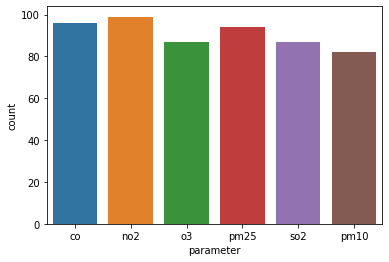

In [20]:
sns.countplot(para_count['parameter'])

In [21]:
para_count.groupby(['parameter']).mean().sort_values('count',ascending=False)

,count
parameter,
no2,20738.202020
pm25,20281.925532
co,20142.552083
o3,19027.195402
pm10,19022.804878
so2,18103.068966


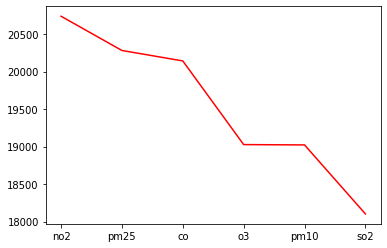

In [22]:
plt.plot(para_count.groupby(['parameter']).mean().sort_values('count',ascending=False),color='Red')

In [23]:
para_count.groupby(['parameter']).max().sort_values('count',ascending=False)

,count
parameter,
no2,64684
co,64122
o3,59990
pm25,58836
so2,43604
pm10,37879


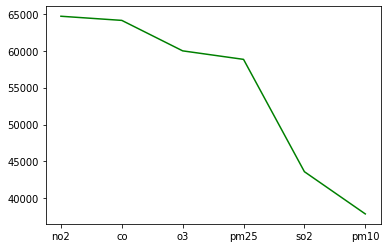

In [24]:
plt.plot(para_count.groupby(['parameter']).max().sort_values('count',ascending=False),color='green')

In [25]:
para_count.groupby(['parameter']).min().sort_values('count',ascending=False)

,count
parameter,
so2,8
co,1
no2,1
o3,1
pm10,1
pm25,1


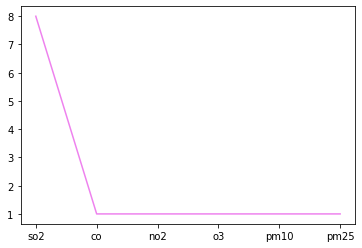

In [26]:
plt.plot(para_count.groupby(['parameter']).min().sort_values('count',ascending=False),color='violet')

In [27]:
para_count.describe()

,count
count,545.000000
mean,19602.699083
std,12694.203217
min,1.000000
25%,6985.000000
50%,22231.000000
75%,28532.000000
max,64684.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002338D779748>,
      dtype=object)

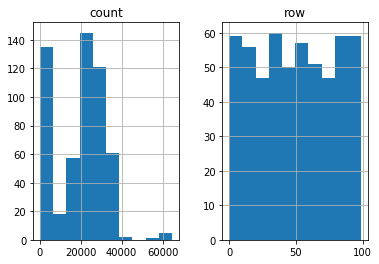

In [28]:
para_row.hist()

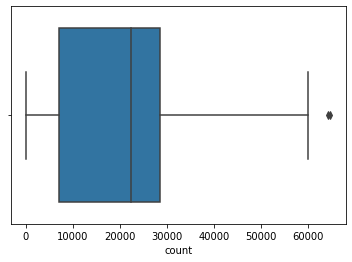

In [29]:
sns.boxplot(para_row['count'])
para_row=para_row[para_row['count']<=60000]

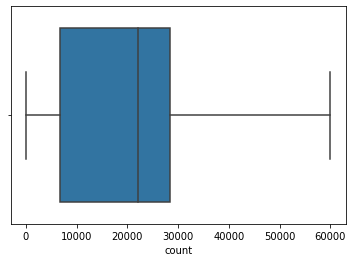

In [30]:
sns.boxplot(para_row['count'])

In [31]:
lst4=[]
for lat in df['coordinates']:
    lst4.append(lat)

In [32]:
coordinate_df=pd.DataFrame(lst4)

In [33]:
coordinate_df.head()

,latitude,longitude
0,27.19866,78.00598
1,23.00266,72.59191
2,23.71763,92.71928
3,26.47086,74.64659
4,27.55479,76.61153


In [34]:
coordinate_df.describe()

,latitude,longitude
count,100.000000,100.000000
mean,23.242198,77.644582
std,7.104312,2.293822
min,10.942450,72.591910
25%,13.165785,77.089645
50%,28.505295,77.245230
75%,28.655685,77.585157
max,31.620000,92.719280


In [35]:
coordinate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
latitude     100 non-null float64
longitude    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0, 0.5, 'Longitude')

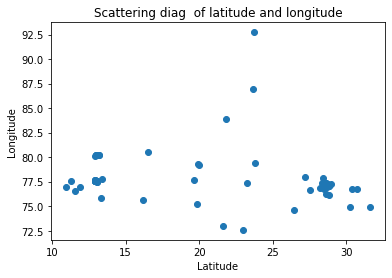

In [36]:
plt.scatter(coordinate_df['latitude'],coordinate_df['longitude'])
plt.title('Scattering diag  of latitude and longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [37]:
df['first_date_parsed'] = pd.to_datetime(df['firstUpdated'])
df.head()

,cities,city,coordinates,count,country,countsByMeasurement,firstUpdated,id,lastUpdated,location,locations,parameters,sourceName,sourceNames,sourceType,sourceTypes,first_date_parsed
0,[Agra],Agra,"{'longitude': 78.00598, 'latitude': 27.19866}",254365,IN,"[{'parameter': 'co', 'count': 58297}, {'parame...",2016-03-22T00:20:00.000Z,IN-35,2020-10-12T01:15:00.000Z,"Sanjay Palace, Agra - UPPCB","[Sanjay Palace, Sanjay Palace, Agra - UPPCB]","[co, no2, o3, pm25, so2]",caaqm,"[CPCB, data.gov.in, caaqm]",government,[government],2016-03-22 00:20:00+00:00
1,"[Ahmedabad, On the terrace of Water distributi...",Ahmedabad,"{'longitude': 72.59191, 'latitude': 23.00266}",203548,IN,"[{'parameter': 'co', 'count': 35733}, {'parame...",2018-03-09T05:30:00.000Z,IN-101,2020-10-12T01:15:00.000Z,"Maninagar, Ahmedabad - GPCB","[Maninagar, Ahmedabad - GPCB]","[co, no2, o3, pm10, pm25, so2]",caaqm,"[data.gov.in, caaqm]",government,[government],2018-03-09 05:30:00+00:00
2,[Aizawl],Aizawl,"{'longitude': 92.71928, 'latitude': 23.71763}",29772,IN,"[{'parameter': 'co', 'count': 4962}, {'paramet...",2020-03-19T04:30:00.000Z,IN-314,2020-10-02T23:15:00.000Z,"Sikulpuikawn, Aizawl - Mizoram PCB","[Sikulpuikawn, Aizawl - Mizoram PCB]","[co, no2, o3, pm10, pm25, so2]",caaqm,[caaqm],government,[government],2020-03-19 04:30:00+00:00
3,[Ajmer],Ajmer,"{'longitude': 74.64659, 'latitude': 26.47086}",197564,IN,"[{'parameter': 'co', 'count': 32985}, {'parame...",2018-04-16T03:15:00.000Z,IN-143,2020-10-12T01:00:00.000Z,"Civil Lines, Ajmer - RSPCB","[Civil Lines, Ajmer - RSPCB]","[co, no2, o3, pm10, pm25, so2]",caaqm,[caaqm],government,[government],2018-04-16 03:15:00+00:00
4,"[Alwar, Alwar, Alwar - Jaipur Rd]",Alwar,"{'longitude': 76.61153, 'latitude': 27.55479}",224411,IN,"[{'parameter': 'co', 'count': 37576}, {'parame...",2018-03-09T05:30:00.000Z,IN-72,2020-10-12T01:15:00.000Z,"Moti Doongri, Alwar - RSPCB","[Moti Doongri, Alwar, Rajasthan - RSPCB, Moti ...","[co, no2, o3, pm10, pm25, so2]",caaqm,"[data.gov.in, caaqm]",government,[government],2018-03-09 05:30:00+00:00


In [38]:
df['last_date_parsed'] = pd.to_datetime(df['lastUpdated'])
df.head()

,cities,city,coordinates,count,country,countsByMeasurement,firstUpdated,id,lastUpdated,location,locations,parameters,sourceName,sourceNames,sourceType,sourceTypes,first_date_parsed,last_date_parsed
0,[Agra],Agra,"{'longitude': 78.00598, 'latitude': 27.19866}",254365,IN,"[{'parameter': 'co', 'count': 58297}, {'parame...",2016-03-22T00:20:00.000Z,IN-35,2020-10-12T01:15:00.000Z,"Sanjay Palace, Agra - UPPCB","[Sanjay Palace, Sanjay Palace, Agra - UPPCB]","[co, no2, o3, pm25, so2]",caaqm,"[CPCB, data.gov.in, caaqm]",government,[government],2016-03-22 00:20:00+00:00,2020-10-12 01:15:00+00:00
1,"[Ahmedabad, On the terrace of Water distributi...",Ahmedabad,"{'longitude': 72.59191, 'latitude': 23.00266}",203548,IN,"[{'parameter': 'co', 'count': 35733}, {'parame...",2018-03-09T05:30:00.000Z,IN-101,2020-10-12T01:15:00.000Z,"Maninagar, Ahmedabad - GPCB","[Maninagar, Ahmedabad - GPCB]","[co, no2, o3, pm10, pm25, so2]",caaqm,"[data.gov.in, caaqm]",government,[government],2018-03-09 05:30:00+00:00,2020-10-12 01:15:00+00:00
2,[Aizawl],Aizawl,"{'longitude': 92.71928, 'latitude': 23.71763}",29772,IN,"[{'parameter': 'co', 'count': 4962}, {'paramet...",2020-03-19T04:30:00.000Z,IN-314,2020-10-02T23:15:00.000Z,"Sikulpuikawn, Aizawl - Mizoram PCB","[Sikulpuikawn, Aizawl - Mizoram PCB]","[co, no2, o3, pm10, pm25, so2]",caaqm,[caaqm],government,[government],2020-03-19 04:30:00+00:00,2020-10-02 23:15:00+00:00
3,[Ajmer],Ajmer,"{'longitude': 74.64659, 'latitude': 26.47086}",197564,IN,"[{'parameter': 'co', 'count': 32985}, {'parame...",2018-04-16T03:15:00.000Z,IN-143,2020-10-12T01:00:00.000Z,"Civil Lines, Ajmer - RSPCB","[Civil Lines, Ajmer - RSPCB]","[co, no2, o3, pm10, pm25, so2]",caaqm,[caaqm],government,[government],2018-04-16 03:15:00+00:00,2020-10-12 01:00:00+00:00
4,"[Alwar, Alwar, Alwar - Jaipur Rd]",Alwar,"{'longitude': 76.61153, 'latitude': 27.55479}",224411,IN,"[{'parameter': 'co', 'count': 37576}, {'parame...",2018-03-09T05:30:00.000Z,IN-72,2020-10-12T01:15:00.000Z,"Moti Doongri, Alwar - RSPCB","[Moti Doongri, Alwar, Rajasthan - RSPCB, Moti ...","[co, no2, o3, pm10, pm25, so2]",caaqm,"[data.gov.in, caaqm]",government,[government],2018-03-09 05:30:00+00:00,2020-10-12 01:15:00+00:00


In [39]:
f_date =pd.DataFrame({"year": df['first_date_parsed'].dt.year,
              "month":df['first_date_parsed'].dt.month,
              "day": df['first_date_parsed'].dt.day,
              "hour": df['first_date_parsed'].dt.hour,
              "dayofyear": df['first_date_parsed'].dt.dayofyear,
              "week": df['first_date_parsed'].dt.week,
              "weekofyear": df['first_date_parsed'].dt.weekofyear,
              "dayofweek": df['first_date_parsed'].dt.dayofweek,
              "quarter": df['first_date_parsed'].dt.quarter,
             })


In [40]:
f_date.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,quarter
0,2016,3,22,0,82,12,12,1,1
1,2018,3,9,5,68,10,10,4,1
2,2020,3,19,4,79,12,12,3,1
3,2018,4,16,3,106,16,16,0,2
4,2018,3,9,5,68,10,10,4,1


In [41]:
l_date =pd.DataFrame({"lyear": df['last_date_parsed'].dt.year,
                      "lmonth":df['last_date_parsed'].dt.month,
                      "lday": df['last_date_parsed'].dt.day,
                      "lhour": df['last_date_parsed'].dt.hour,
                      "ldayofyear": df['last_date_parsed'].dt.dayofyear,
                      "lweek": df['last_date_parsed'].dt.week,
                      "lweekofyear": df['last_date_parsed'].dt.weekofyear,
                      "ldayofweek": df['last_date_parsed'].dt.dayofweek,
                      "lquarter": df['last_date_parsed'].dt.quarter,
             })


In [42]:
l_date.head()

,lyear,lmonth,lday,lhour,ldayofyear,lweek,lweekofyear,ldayofweek,lquarter
0,2020,10,12,1,286,42,42,0,4
1,2020,10,12,1,286,42,42,0,4
2,2020,10,2,23,276,40,40,4,4
3,2020,10,12,1,286,42,42,0,4
4,2020,10,12,1,286,42,42,0,4


In [43]:
diff_date=pd.DataFrame()


In [44]:
diff_date['d_year']=l_date['lyear']-f_date['year'] 
diff_date['d_month']=l_date['lmonth']-f_date['month'] 
diff_date['d_day']=l_date['lday']-f_date['day'] 
diff_date['d_dayofweek']=l_date['ldayofweek']-f_date['dayofyear'] 
diff_date['d_week']=l_date['lweek']-f_date['week'] 
diff_date['d_weekofyear']=l_date['lweekofyear']-f_date['weekofyear'] 
diff_date['d_dayofyear']=l_date['ldayofweek']-f_date['dayofweek'] 
diff_date['d_quarter']=l_date['lquarter']-f_date['quarter'] 


In [45]:
diff_date.head()

,d_year,d_month,d_day,d_dayofweek,d_week,d_weekofyear,d_dayofyear,d_quarter
0,4,7,-10,-82,30,30,-1,3
1,2,7,3,-68,32,32,-4,3
2,0,7,-17,-75,28,28,1,3
3,2,6,-4,-106,26,26,0,2
4,2,7,3,-68,32,32,-4,3


In [46]:
my_new_df=pd.concat([df['city'],coordinate_df,df['country'],df['count'],para_df,df['first_date_parsed'],f_date,df['last_date_parsed'],l_date],1)

In [47]:
my_new_df.head()

,city,latitude,longitude,country,count,CO,NO2,O3,PM10,PM25,...,last_date_parsed,lyear,lmonth,lday,lhour,ldayofyear,lweek,lweekofyear,ldayofweek,lquarter
0,Agra,27.19866,78.00598,IN,254365,"{'parameter': 'co', 'count': 58297}","{'parameter': 'no2', 'count': 34395}","{'parameter': 'o3', 'count': 59990}","{'parameter': 'pm25', 'count': 58836}","{'parameter': 'so2', 'count': 42847}",...,2020-10-12 01:15:00+00:00,2020,10,12,1,286,42,42,0,4
1,Ahmedabad,23.00266,72.59191,IN,203548,"{'parameter': 'co', 'count': 35733}","{'parameter': 'no2', 'count': 36040}","{'parameter': 'o3', 'count': 35820}","{'parameter': 'pm10', 'count': 24772}","{'parameter': 'pm25', 'count': 36064}",...,2020-10-12 01:15:00+00:00,2020,10,12,1,286,42,42,0,4
2,Aizawl,23.71763,92.71928,IN,29772,"{'parameter': 'co', 'count': 4962}","{'parameter': 'no2', 'count': 4962}","{'parameter': 'o3', 'count': 4962}","{'parameter': 'pm10', 'count': 4962}","{'parameter': 'pm25', 'count': 4962}",...,2020-10-02 23:15:00+00:00,2020,10,2,23,276,40,40,4,4
3,Ajmer,26.47086,74.64659,IN,197564,"{'parameter': 'co', 'count': 32985}","{'parameter': 'no2', 'count': 32988}","{'parameter': 'o3', 'count': 32636}","{'parameter': 'pm10', 'count': 32984}","{'parameter': 'pm25', 'count': 32977}",...,2020-10-12 01:00:00+00:00,2020,10,12,1,286,42,42,0,4
4,Alwar,27.55479,76.61153,IN,224411,"{'parameter': 'co', 'count': 37576}","{'parameter': 'no2', 'count': 37588}","{'parameter': 'o3', 'count': 36592}","{'parameter': 'pm10', 'count': 37591}","{'parameter': 'pm25', 'count': 37530}",...,2020-10-12 01:15:00+00:00,2020,10,12,1,286,42,42,0,4


In [48]:
my_new_df.to_csv('my_result.csv',index=False)